<a href="https://colab.research.google.com/github/khairiyah98/python_eda/blob/main/1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set working directory
#@title Set up Directory { run: "auto"}
import os
from google.colab import drive 
drive.mount('/content/gdrive')
working_directory = 'My Drive/Micron' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
current directory is : /content/gdrive/My Drive/Micron


In [ ]:
import pandas as pd
raw_df = pd.read_csv('Q1a_data.csv') 
raw_df.shape

(10241, 152)

Data **preprocessing**

In [ ]:
final_df = raw_df.dropna()

In [ ]:
final_df.shape

(10144, 152)

In [ ]:
final_df.target.value_counts() #highly imbalanced data, most of observations fall under target = 0

0    9905
1     101
2      58
3      52
4      28
Name: target, dtype: int64

In [ ]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=final_df.iloc[:,0:151]

# Specify the target labels and flatten the array 
y=final_df['target']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

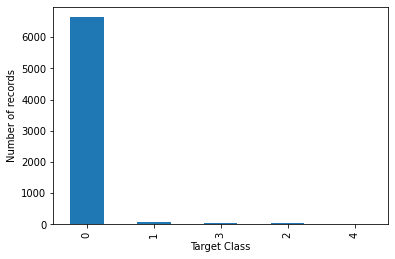

In [ ]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

**Decision Tree Classifier**

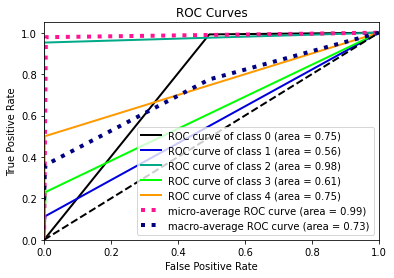

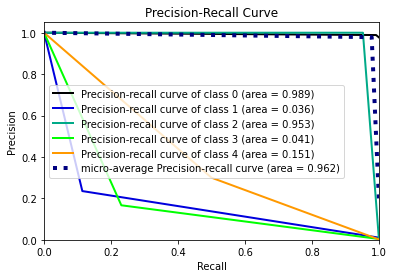

In [ ]:
!pip install scikit-plot
from sklearn.tree import DecisionTreeClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

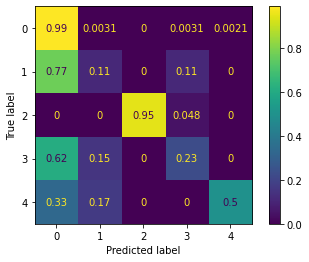

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test,  normalize='true')  
plt.show() 

**Random Forest Classifier**

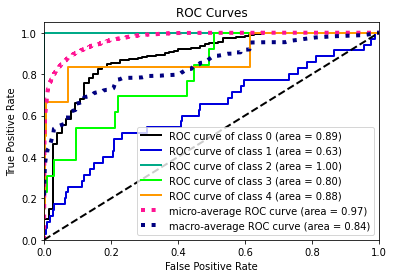

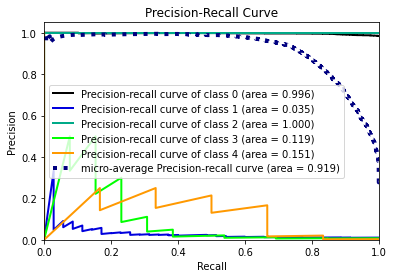

In [ ]:
!pip install scikit-plot
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
model = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced')
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[2945,  141,    6,  180,    1],
       [  16,   10,    0,    7,    2],
       [   0,    0,   21,    0,    0],
       [   4,    3,    0,    6,    0],
       [   4,    1,    0,    0,    1]])

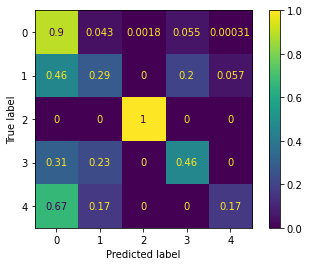

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test,  normalize='true')  
plt.show() 

In [ ]:
precision_score(y_pred,y_test,average=None).mean()

0.5627411085706228

**LightGBM**

In [ ]:
import lightgbm as lgb

#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)
#setting up the parameters
params={}
params['learning_rate']=0.05
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=3
params['num_class']=5 #no.of unique values in the target class not inclusive of the end value
params['is_unbalance'] = "true"
#training the model
clf=lgb.train(params,d_train,200)  #training the model on 100 epocs
#prediction on the test dataset
y_pred_1=clf.predict(X_test)
#printing the predictions
y_pred_1

array([[9.99523815e-01, 4.11344245e-04, 8.52439660e-06, 3.89598239e-05,
        1.73568464e-05],
       [9.99755399e-01, 1.80377473e-04, 5.09828003e-06, 5.07300902e-05,
        8.39553522e-06],
       [9.98498216e-01, 8.31554861e-04, 3.09593278e-05, 4.02191394e-04,
        2.37078137e-04],
       ...,
       [9.99020274e-01, 7.34675952e-04, 1.40581715e-05, 1.77399873e-04,
        5.35918340e-05],
       [9.99706132e-01, 1.58105353e-04, 1.55816504e-05, 9.97705274e-05,
        2.04107987e-05],
       [9.98413461e-01, 9.29011594e-04, 5.35647300e-06, 3.01601315e-04,
        3.50569528e-04]])

In [ ]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred_1]
#printing the predictions
#[0,2,1,0,1,0,0,2,...]

from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
#using precision score for error metrics
#precision_score(y_pred_1,y_test,average=None).mean()

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_1)
matrix

array([[3272,    0,    0,    0,    1],
       [  27,    8,    0,    0,    0],
       [   0,    0,   21,    0,    0],
       [  10,    1,    0,    2,    0],
       [   6,    0,    0,    0,    0]])

**Undersampling (Cluster centroids) + Oversampling (SMOTE)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
n_samples = 1600 # 8000/5

In [ ]:
def sampling_strategy(X,a,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = a.value_counts() > n_samples
    elif t == 'minority':
        target_classes = a.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

In [ ]:
from imblearn.under_sampling import ClusterCentroids
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [ ]:
y_under = pd.Series(y_under)

In [ ]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

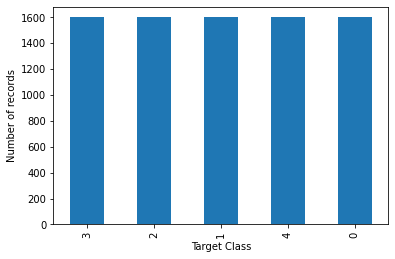

In [ ]:
import matplotlib.pyplot as plt
count = pd.Series(y_bal).value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

**Decision Tree Classifier** on oversampled + undersampled data

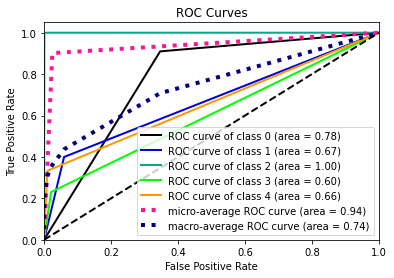

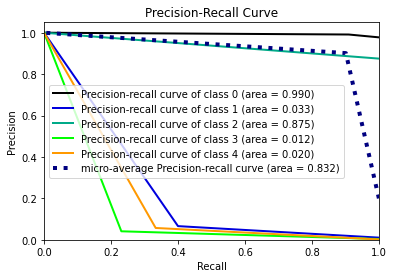

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_bal, y_bal)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[2978,  195,    3,   67,   30],
       [  17,   14,    0,    3,    1],
       [   0,    0,   21,    0,    0],
       [   6,    2,    0,    3,    2],
       [   3,    1,    0,    0,    2]])

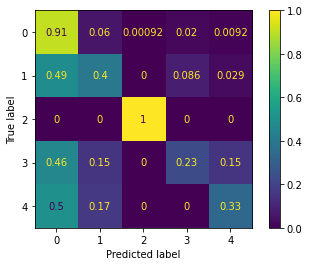

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test,  normalize='true')  
plt.show() 

In [ ]:
precision_score(y_pred,y_test,average=None).mean()

0.5747942372323674

Neural networks on oversampled + undersampled data

In [ ]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
y_bal_dummy = np_utils.to_categorical(y_bal)
y_test_dummy = np_utils.to_categorical(y_test)

In [ ]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(8, input_dim=151, activation='relu'))

# Add one hidden layer 
model.add(Dense(16, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(24,activation='relu'))

# Add an output layer 
model.add(Dense(5, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_bal,
                    y_bal_dummy,
                    callbacks=[es],
                    epochs=1000, # you can set this to a big number!
                    batch_size=32,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/1000
200/200 [==============================] - 2s 4ms/step - loss: 1.4606 - accuracy: 0.3430 - val_loss: 4.4273 - val_accuracy: 0.0100
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.6847 - val_loss: 5.9012 - val_accuracy: 0.0106
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8150 - val_loss: 5.2484 - val_accuracy: 0.0125
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8790 - val_loss: 5.0283 - val_accuracy: 0.0131
Epoch 5/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.9199 - val_loss: 4.6123 - val_accuracy: 0.0137
Epoch 6/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9417 - val_loss: 4.6875 - val_accuracy: 0.0137
Epoch 7/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9487 - val_loss: 4.1557 - val_accuracy:

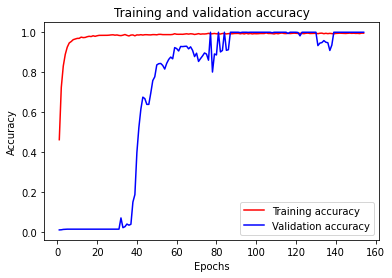

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X_test) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(y_test_dummy.argmax(axis=1), preds.argmax(axis=1))
matrix

[9.9999535e-01 5.7115928e-18 5.1911333e-09 3.8405605e-15 4.6423784e-06]
1.0


array([[3092,   90,    5,   53,   33],
       [  25,    7,    0,    2,    1],
       [   0,    0,   21,    0,    0],
       [   8,    3,    0,    1,    1],
       [   4,    0,    0,    0,    2]])